In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,690 cases (7 day average) as of Sat 15 May, +1.9 since Fri 14 May
74 hospitalised (7 day average) as of Mon 17 May, -0.3 since Sun 16 May
6 died (7 day average) as of Sat 15 May, -0.6 since Fri 14 May


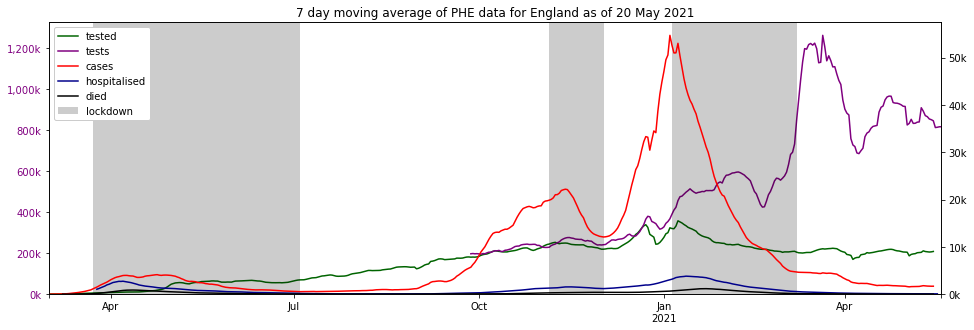

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

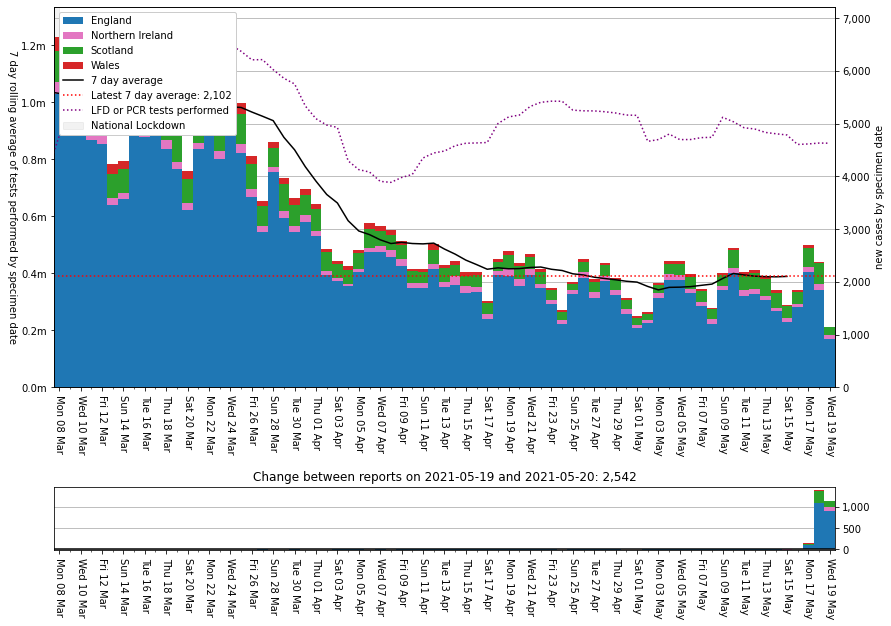

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

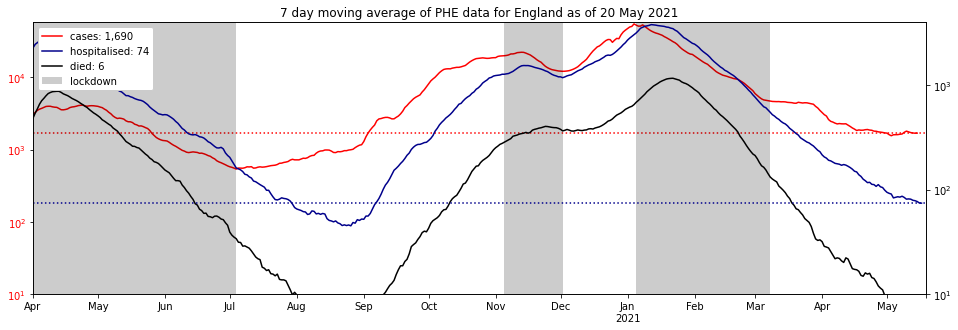

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

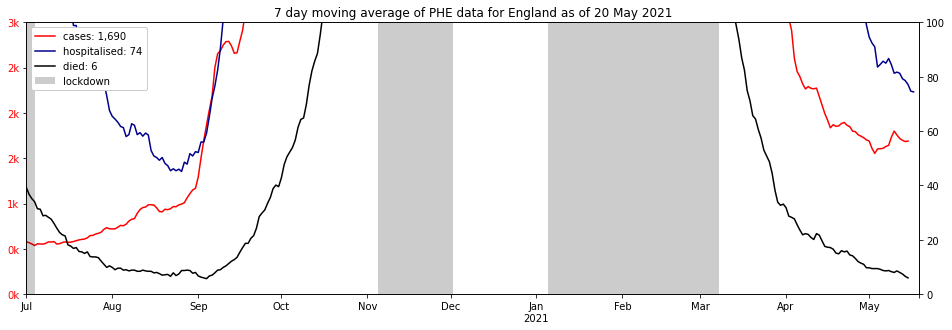

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,19 May 21,"+17,960,954","+31,120,020","+17,960,954","+309,020","+235,979","+309,020"
Northern Ireland,19 May 21,"+583,977","+1,008,589","+583,977","+8,918","+4,519","+8,918"
Scotland,19 May 21,"+1,742,072","+3,063,648","+1,742,072","+37,684","+12,265","+37,684"
Wales,19 May 21,"+952,468","+2,058,106","+952,468","+13,396","+12,095","+13,396"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,17960954.0,31120020.0,13159066.0,56286961,31.909618,23.378533,44.711849
1,Northern Ireland,N92000002,583977.0,1008589.0,424612.0,1893667,30.838421,22.422739,46.738841
2,Scotland,S92000003,1742072.0,3063648.0,1321576.0,5463300,31.886808,24.190068,43.923123
3,Wales,W92000004,952468.0,2058106.0,1105638.0,3152879,30.209469,35.067568,34.722963


'partial: 37,250,363 (55.8%), full: 21,239,471'

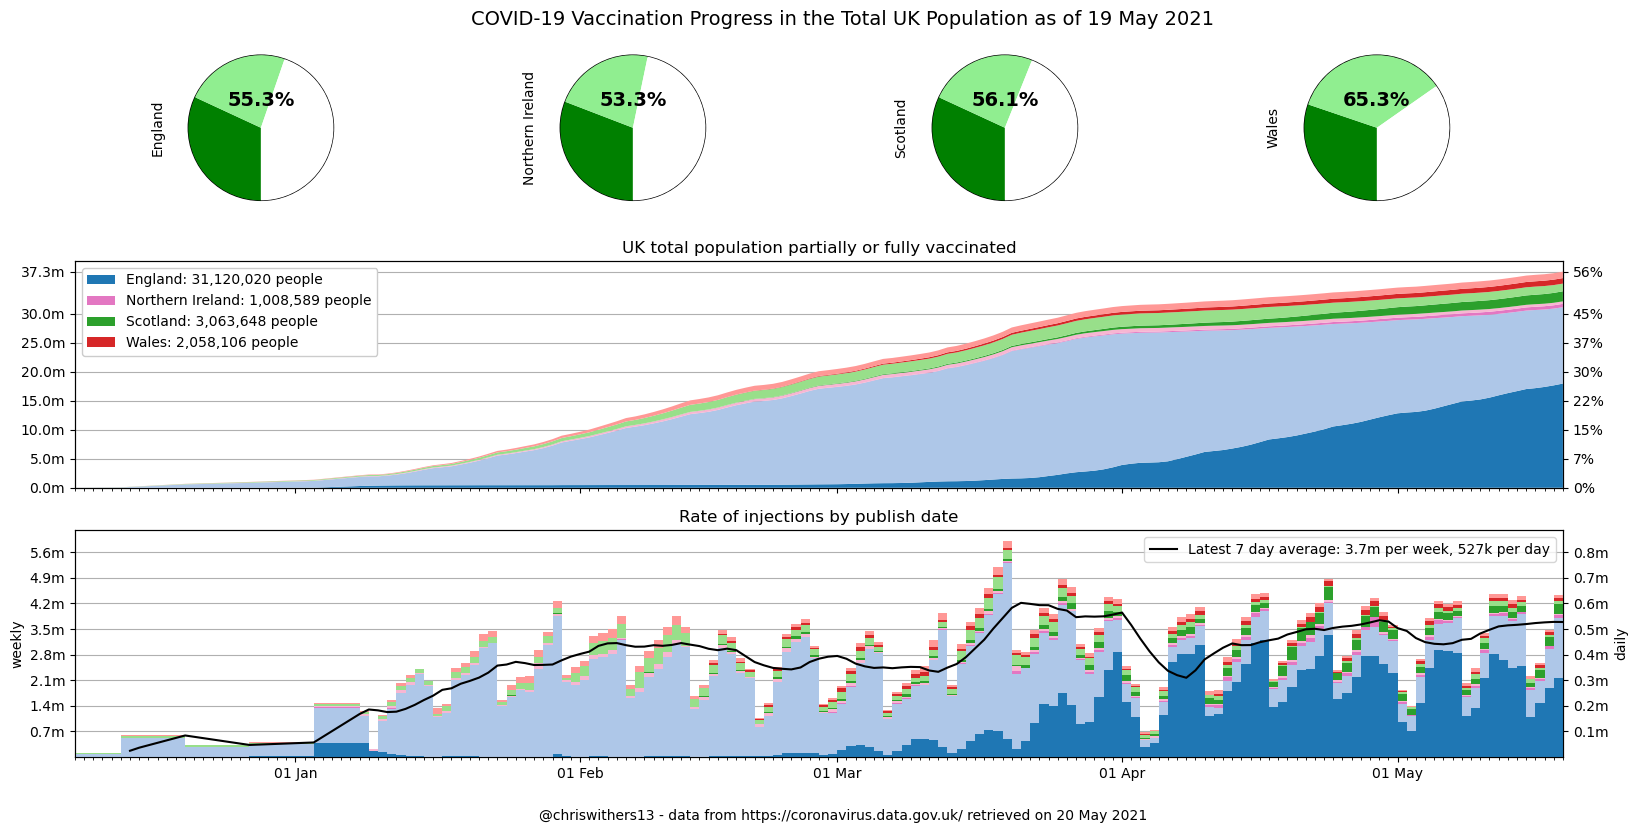

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

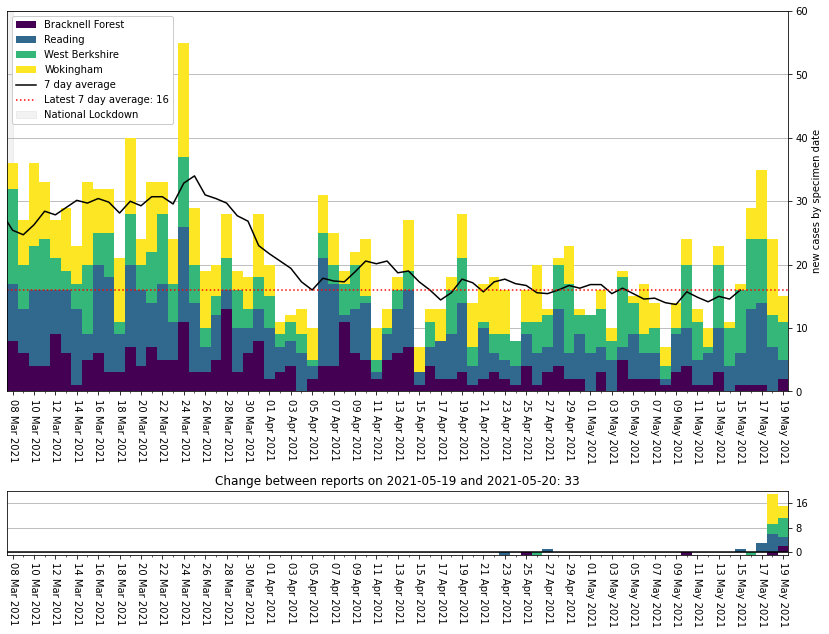

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], ylim=60)

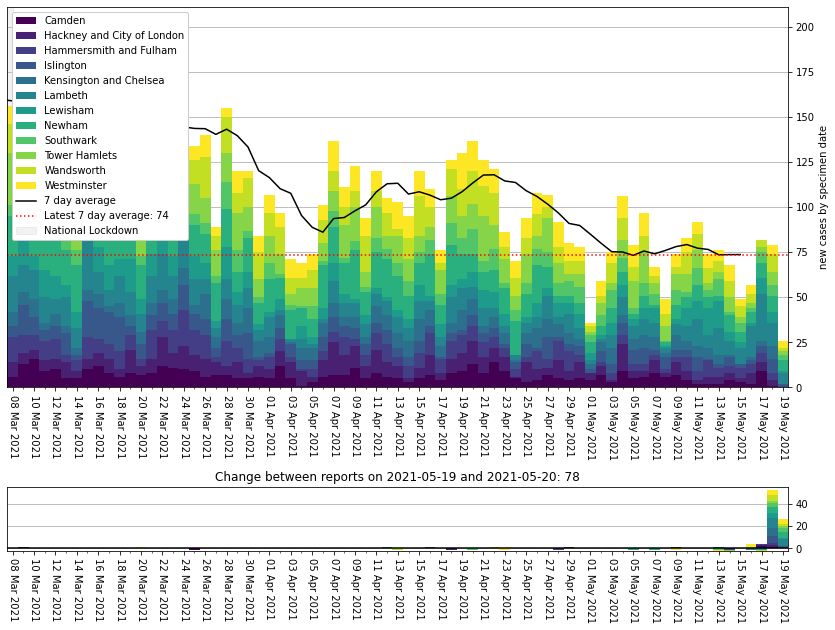

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1])

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,355.764215,1023.0,2021-05-19
E06000008,Blackburn with Darwen,206.418341,309.0,2021-05-19
E06000055,Bedford,124.068047,215.0,2021-05-19
S12000049,Glasgow City,108.984079,690.0,2021-05-19
S12000011,East Renfrewshire,101.538784,97.0,2021-05-19
N09000005,Derry City and Strabane,85.931096,130.0,2021-05-19
S12000005,Clackmannanshire,83.430345,43.0,2021-05-19
E08000034,Kirklees,80.266129,353.0,2021-05-19
S12000019,Midlothian,61.648280,57.0,2021-05-19


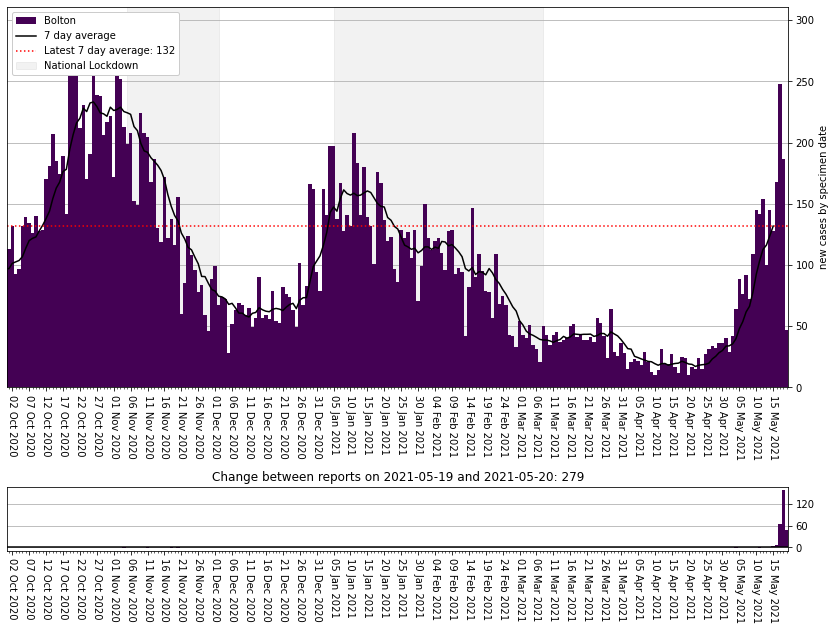

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,355.764215,1023.0,2021-05-19
S12000049,Glasgow City,108.984079,690.0,2021-05-19
E08000034,Kirklees,80.266129,353.0,2021-05-19
E06000008,Blackburn with Darwen,206.418341,309.0,2021-05-19
E08000035,Leeds,34.294115,272.0,2021-05-19
E08000003,Manchester,45.038690,249.0,2021-05-19
E08000032,Bradford,40.757648,220.0,2021-05-19
E06000055,Bedford,124.068047,215.0,2021-05-19
E08000025,Birmingham,18.129016,207.0,2021-05-19


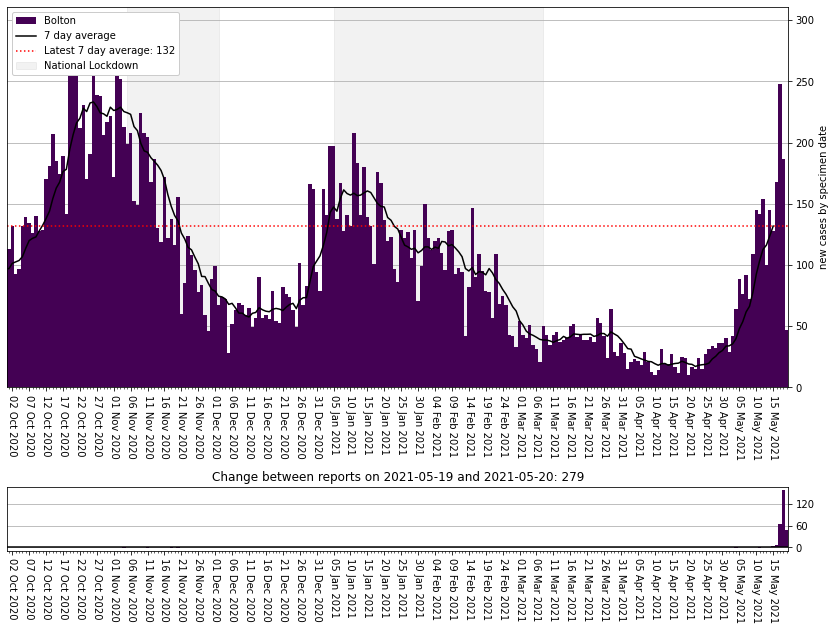

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.25

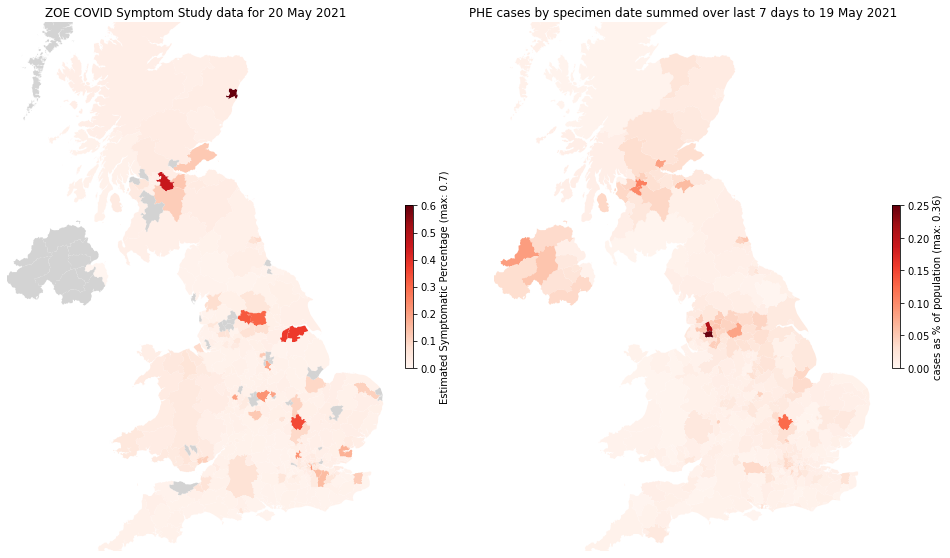

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...